In [1]:
# load hdf5 file and plot the data
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
from imblearn.under_sampling import TomekLinks, ClusterCentroids

In [2]:
vdisc_train_raw = h5py.File('Datasets/VDISC_train.hdf5')
vdisc_test_raw = h5py.File('Datasets/VDISC_test.hdf5')
vdisc_valid_raw = h5py.File('Datasets/VDISC_validate.hdf5')

In [3]:
# Convert hdf5 to pandas dataframe
def hdf5_to_df(hdf5_file):
    data_frame = {
        'code': hdf5_file['functionSource'],
        'CWE-119': hdf5_file['CWE-119'],
        'CWE-120': hdf5_file['CWE-120'],
        'CWE-469': hdf5_file['CWE-469'],
        'CWE-476': hdf5_file['CWE-476'],
        'CWE-OTHERS': hdf5_file['CWE-other'],
    }
    return pd.DataFrame(data=data_frame)

In [4]:
vdisc_train = hdf5_to_df(vdisc_train_raw)
vdisc_test = hdf5_to_df(vdisc_test_raw)
vdisc_valid = hdf5_to_df(vdisc_valid_raw)

In [5]:
vdisc_train.head()

,code,CWE-119,CWE-120,CWE-469,CWE-476,CWE-OTHERS
0,"b'clear_area(int startx, int starty, int xsize...",False,False,False,False,False
1,b'ReconstructDuList(Statement* head)\n{\n S...,False,False,False,False,False
2,b'free_speaker(void)\n{\n if(Lengths)\n ...,False,False,False,False,False
3,b'mlx4_register_device(struct mlx4_dev *dev)\n...,False,False,False,False,False
4,"b'Parse_Env_Var(void)\n{\n char *p = getenv(""...",True,True,False,False,True


In [6]:
vdisc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019471 entries, 0 to 1019470
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   code        1019471 non-null  object
 1   CWE-119     1019471 non-null  bool  
 2   CWE-120     1019471 non-null  bool  
 3   CWE-469     1019471 non-null  bool  
 4   CWE-476     1019471 non-null  bool  
 5   CWE-OTHERS  1019471 non-null  bool  
dtypes: bool(5), object(1)
memory usage: 12.6+ MB


In [7]:
# Combine the three datasets
vdisc = pd.concat([vdisc_train, vdisc_test, vdisc_valid], ignore_index=True)
vdisc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274366 entries, 0 to 1274365
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   code        1274366 non-null  object
 1   CWE-119     1274366 non-null  bool  
 2   CWE-120     1274366 non-null  bool  
 3   CWE-469     1274366 non-null  bool  
 4   CWE-476     1274366 non-null  bool  
 5   CWE-OTHERS  1274366 non-null  bool  
dtypes: bool(5), object(1)
memory usage: 15.8+ MB


In [8]:
# Convert byte strings to normal strings and remove leading/trailing b' and '
vdisc = vdisc.applymap(lambda x: x.decode('utf-8').strip("b'") if isinstance(x, bytes) else x)

# Check the cleaned data
vdisc.head()

C:\Users\ireen\AppData\Local\Temp\ipykernel_22020\4044570632.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vdisc = vdisc.applymap(lambda x: x.decode('utf-8').strip("b'") if isinstance(x, bytes) else x)


,code,CWE-119,CWE-120,CWE-469,CWE-476,CWE-OTHERS
0,"clear_area(int startx, int starty, int xsize, ...",False,False,False,False,False
1,ReconstructDuList(Statement* head)\n{\n Sta...,False,False,False,False,False
2,free_speaker(void)\n{\n if(Lengths)\n ...,False,False,False,False,False
3,mlx4_register_device(struct mlx4_dev *dev)\n{\...,False,False,False,False,False
4,"Parse_Env_Var(void)\n{\n char *p = getenv(""LI...",True,True,False,False,True


In [9]:
vdisc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274366 entries, 0 to 1274365
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   code        1274366 non-null  object
 1   CWE-119     1274366 non-null  bool  
 2   CWE-120     1274366 non-null  bool  
 3   CWE-469     1274366 non-null  bool  
 4   CWE-476     1274366 non-null  bool  
 5   CWE-OTHERS  1274366 non-null  bool  
dtypes: bool(5), object(1)
memory usage: 15.8+ MB


### Separate the data into each CWE

In [10]:
# CWE-119
drop_cols = ['CWE-120', 'CWE-469', 'CWE-476', 'CWE-OTHERS']
cwe_119_df = vdisc.drop(columns=drop_cols, axis=1)
cwe_119_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274366 entries, 0 to 1274365
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   code     1274366 non-null  object
 1   CWE-119  1274366 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 10.9+ MB


In [11]:
# CWE-120
drop_cols = ['CWE-119', 'CWE-469', 'CWE-476', 'CWE-OTHERS']
cwe_120_df = vdisc.drop(columns=drop_cols, axis=1)
cwe_120_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274366 entries, 0 to 1274365
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   code     1274366 non-null  object
 1   CWE-120  1274366 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 10.9+ MB


In [12]:
# CWE-469
drop_cols = ['CWE-119', 'CWE-120', 'CWE-476', 'CWE-OTHERS']
cwe_469_df = vdisc.drop(columns=drop_cols, axis=1)
cwe_469_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274366 entries, 0 to 1274365
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   code     1274366 non-null  object
 1   CWE-469  1274366 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 10.9+ MB


In [13]:
# CWE-476
drop_cols = ['CWE-119', 'CWE-120', 'CWE-469', 'CWE-OTHERS']
cwe_476_df = vdisc.drop(columns=drop_cols, axis=1)
cwe_476_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274366 entries, 0 to 1274365
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   code     1274366 non-null  object
 1   CWE-476  1274366 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 10.9+ MB


In [14]:
# CWE-OTHERS
drop_cols = ['CWE-119', 'CWE-120', 'CWE-469', 'CWE-476']
cwe_others_df = vdisc.drop(columns=drop_cols, axis=1)
cwe_others_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274366 entries, 0 to 1274365
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   code        1274366 non-null  object
 1   CWE-OTHERS  1274366 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 10.9+ MB


### Checking True Positive and False Positive for each CWE

CWE-119
False    1250209
True       24157
Name: count, dtype: int64


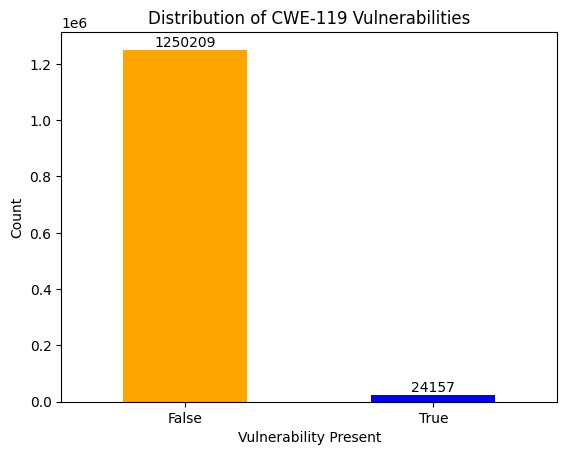

In [15]:
# Plot the distribution of CWE-119 vulnerabilities
counts = cwe_119_df['CWE-119'].value_counts()
ax = counts.plot(kind='bar', color=['orange', 'blue'])
plt.xticks(rotation=0)
plt.title('Distribution of CWE-119 Vulnerabilities')
plt.xlabel('Vulnerability Present')
plt.ylabel('Count')

# Add count labels on top of each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
print(counts)
plt.show()

CWE-120
False    1226706
True       47660
Name: count, dtype: int64


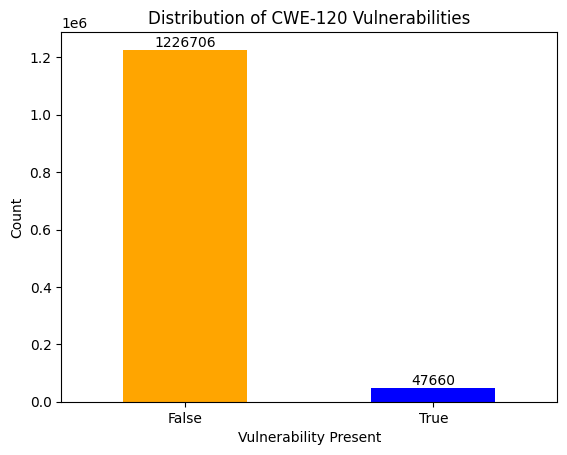

In [16]:
# Plot the distribution of CWE-120 vulnerabilities
counts = cwe_120_df['CWE-120'].value_counts()
ax = counts.plot(kind='bar', color=['orange', 'blue'])
plt.xticks(rotation=0)
plt.title('Distribution of CWE-120 Vulnerabilities')
plt.xlabel('Vulnerability Present')
plt.ylabel('Count')

# Add count labels on top of each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
print(counts)
plt.show()

CWE-469
False    1271741
True        2625
Name: count, dtype: int64


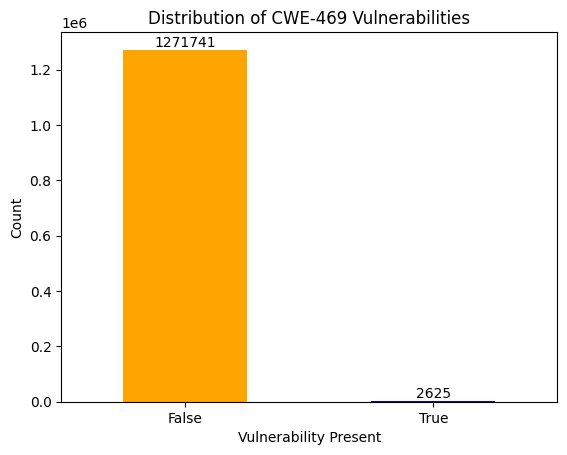

In [17]:
# Plot the distribution of CWE-469 vulnerabilities
counts = cwe_469_df['CWE-469'].value_counts()
ax = counts.plot(kind='bar', color=['orange', 'blue'])
plt.xticks(rotation=0)
plt.title('Distribution of CWE-469 Vulnerabilities')
plt.xlabel('Vulnerability Present')
plt.ylabel('Count')

# Add count labels on top of each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
print(counts)
plt.show()

CWE-476
False    1262272
True       12094
Name: count, dtype: int64


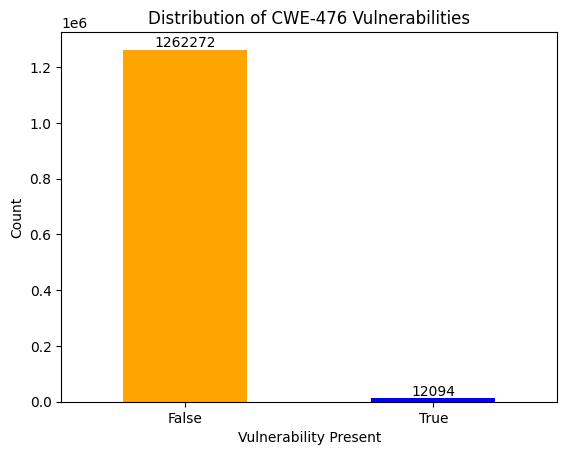

In [18]:
# Plot the distribution of CWE-476 vulnerabilities
counts = cwe_476_df['CWE-476'].value_counts()
ax = counts.plot(kind='bar', color=['orange', 'blue'])
plt.xticks(rotation=0)
plt.title('Distribution of CWE-476 Vulnerabilities')
plt.xlabel('Vulnerability Present')
plt.ylabel('Count')

# Add count labels on top of each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
print(counts)  
plt.show()

CWE-OTHERS
False    1239338
True       35028
Name: count, dtype: int64


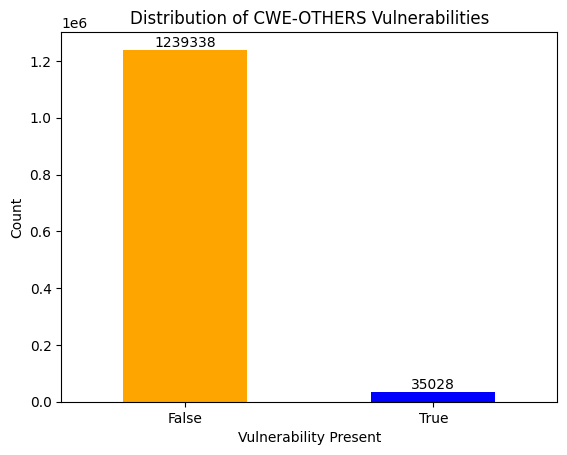

In [19]:
# Plot the distribution of CWE-OTHERS vulnerabilities
counts = cwe_others_df['CWE-OTHERS'].value_counts()
ax = counts.plot(kind='bar', color=['orange', 'blue'])
plt.xticks(rotation=0)
plt.title('Distribution of CWE-OTHERS Vulnerabilities')
plt.xlabel('Vulnerability Present')
plt.ylabel('Count')

# Add count labels on top of each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
print(counts)
plt.show()

### Balancing the data for each CWE using random undersampling technique

In [20]:
# Randomly undersampling

def under_sampling(dataframe, vulnType, samples=None):
    shuffled_df = dataframe.sample(frac=1, random_state=4)

    # Separate vulnerable and non-vulnerable samples
    vul_df = shuffled_df[shuffled_df[vulnType] == True]
    
    # Set samples to match vulnerable count if not provided
    if samples is None:
        samples = len(vul_df)

    # Randomly undersample the majority class
    non_vul_df = shuffled_df[shuffled_df[vulnType] == 0].sample(n=samples, random_state=42)

    # Concatenate the two dataframes
    balanced_df = pd.concat([vul_df, non_vul_df]).sample(frac=1, random_state=4).reset_index(drop=True)

    return balanced_df

In [21]:
# ClusterCentroids undersampling

"""

def undersample_cluster(dataframe, vulnType):
    X = dataframe.drop(columns=[vulnType])  # Features
    y = dataframe[vulnType]  # Labels
    
    # Apply ClusterCentroids
    undersampler = ClusterCentroids(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    # Recreate DataFrame
    balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
    balanced_df[vulnType] = y_resampled

    return balanced_df

"""

"\n\ndef undersample_cluster(dataframe, vulnType):\n    X = dataframe.drop(columns=[vulnType])  # Features\n    y = dataframe[vulnType]  # Labels\n    \n    # Apply ClusterCentroids\n    undersampler = ClusterCentroids(sampling_strategy='auto', random_state=42)\n    X_resampled, y_resampled = undersampler.fit_resample(X, y)\n    \n    # Recreate DataFrame\n    balanced_df = pd.DataFrame(X_resampled, columns=X.columns)\n    balanced_df[vulnType] = y_resampled\n\n    return balanced_df\n\n"

In [22]:
# Apply undersampling to the datasets
normalize_CWE_119 = under_sampling(cwe_119_df, 'CWE-119')
nomarlize_CWE_120 = under_sampling(cwe_120_df, 'CWE-120')
normalize_CWE_469 = under_sampling(cwe_469_df, 'CWE-469')
normalize_CWE_476 = under_sampling(cwe_476_df, 'CWE-476')
normalize_CWE_others = under_sampling(cwe_others_df, 'CWE-OTHERS')

In [23]:
# Reset the index
normalize_CWE_119.reset_index(inplace=True)
nomarlize_CWE_120.reset_index(inplace=True)
normalize_CWE_469.reset_index(inplace=True)
normalize_CWE_476.reset_index(inplace=True)
normalize_CWE_others.reset_index(inplace=True)

In [24]:
# Add type column to the datasets
normalize_CWE_119['type'] = 'CWE-119'
nomarlize_CWE_120['type'] = 'CWE-120'
normalize_CWE_469['type'] = 'CWE-469'
normalize_CWE_476['type'] = 'CWE-476'
normalize_CWE_others['type'] = 'CWE-OTHERS'

In [25]:
# Rename the columns
normalize_CWE_119.columns = ['testID', 'code', 'vuln', 'type']
nomarlize_CWE_120.columns = ['testID', 'code', 'vuln', 'type']
normalize_CWE_469.columns = ['testID', 'code', 'vuln', 'type']
normalize_CWE_476.columns = ['testID', 'code', 'vuln', 'type']
normalize_CWE_others.columns = ['testID', 'code', 'vuln', 'type']

In [26]:
normalize_CWE_119['testID'] = normalize_CWE_119.index
nomarlize_CWE_120['testID'] = nomarlize_CWE_120.index
normalize_CWE_469['testID'] = normalize_CWE_469.index
normalize_CWE_476['testID'] = normalize_CWE_476.index
normalize_CWE_others['testID'] = normalize_CWE_others.index

In [27]:
normalize_CWE_119.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48314 entries, 0 to 48313
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   testID  48314 non-null  int64 
 1   code    48314 non-null  object
 2   vuln    48314 non-null  bool  
 3   type    48314 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 1.2+ MB


Adding a "filename" column to each dataframe, which should be a string or object needed as input for the Clang parser used later in "AST_extracting.ipynb"

In [28]:
# Add filename column to each normalized dataframe
def add_filename_column(df, prefix):
    # insert filename column after testID
    df.insert(1, 'filename', prefix + '_' + df['testID'].astype(str) + '.c')
    return df

normalize_CWE_119 = add_filename_column(normalize_CWE_119, "cwe119")
nomarlize_CWE_120 = add_filename_column(nomarlize_CWE_120, "cwe120") 
normalize_CWE_469 = add_filename_column(normalize_CWE_469, "cwe469")
normalize_CWE_476 = add_filename_column(normalize_CWE_476, "cwe476")
normalize_CWE_others = add_filename_column(normalize_CWE_others, "cweother")

In [43]:
normalize_CWE_469.head()

,testID,filename,code,vuln,type
0,0,cwe469_0.c,"gretl_list_build (const char *s, const DATASET...",False,CWE-469
1,1,cwe469_1.c,rd_meta_is_broken(FILE *fp)\n{\n char buf[M...,True,CWE-469
2,2,cwe469_2.c,"load( f_ck_query query_func, t_CKBOOL lazy )\n...",False,CWE-469
3,3,cwe469_3.c,checkSupGroups (LDAP * ld)\n{\n LDAPMessage *...,True,CWE-469
4,4,cwe469_4.c,"dht_getxattr_unwind (call_frame_t *frame,\n ...",False,CWE-469


In [44]:
# Saving the normalized dataframes to csv files
normalize_CWE_119.to_csv('Datasets/Normalized_CWE-119.csv.gz', index=False)
nomarlize_CWE_120.to_csv('Datasets/Normalized_CWE-120.csv.gz', index=False)
normalize_CWE_469.to_csv('Datasets/Normalized_CWE-469.csv.gz', index=False)
normalize_CWE_476.to_csv('Datasets/Normalized_CWE-476.csv.gz', index=False)
normalize_CWE_others.to_csv('Datasets/Normalized_CWE-OTHERS.csv.gz', index=False)

### Combine all the dataframes into one dataframe

In [31]:
vdisc.head()

,code,CWE-119,CWE-120,CWE-469,CWE-476,CWE-OTHERS
0,"clear_area(int startx, int starty, int xsize, ...",False,False,False,False,False
1,ReconstructDuList(Statement* head)\n{\n Sta...,False,False,False,False,False
2,free_speaker(void)\n{\n if(Lengths)\n ...,False,False,False,False,False
3,mlx4_register_device(struct mlx4_dev *dev)\n{\...,False,False,False,False,False
4,"Parse_Env_Var(void)\n{\n char *p = getenv(""LI...",True,True,False,False,True


In [32]:
vdisc['CWE-COMBINED'] = vdisc[['CWE-119', 'CWE-120', 'CWE-469', 'CWE-476', 'CWE-OTHERS']].any(axis=1)

# Convert only boolean columns (excluding CWE-COMBINED) to 0/1
for col in vdisc.columns:
    if col != 'CWE-COMBINED' and vdisc[col].dtype == 'bool':
        vdisc[col] = vdisc[col].astype(int)

vdisc.head()

,code,CWE-119,CWE-120,CWE-469,CWE-476,CWE-OTHERS,CWE-COMBINED
0,"clear_area(int startx, int starty, int xsize, ...",0,0,0,0,0,False
1,ReconstructDuList(Statement* head)\n{\n Sta...,0,0,0,0,0,False
2,free_speaker(void)\n{\n if(Lengths)\n ...,0,0,0,0,0,False
3,mlx4_register_device(struct mlx4_dev *dev)\n{\...,0,0,0,0,0,False
4,"Parse_Env_Var(void)\n{\n char *p = getenv(""LI...",1,1,0,0,1,True


In [33]:
pd.Series(vdisc["CWE-COMBINED"]).value_counts()

CWE-COMBINED
False    1191955
True       82411
Name: count, dtype: int64

In [34]:
cols_to_drop = ["CWE-119", "CWE-120" , "CWE-469", "CWE-476", "CWE-OTHERS"]
temp = vdisc.drop(columns=cols_to_drop, axis=1)
temp.head()

,code,CWE-COMBINED
0,"clear_area(int startx, int starty, int xsize, ...",False
1,ReconstructDuList(Statement* head)\n{\n Sta...,False
2,free_speaker(void)\n{\n if(Lengths)\n ...,False
3,mlx4_register_device(struct mlx4_dev *dev)\n{\...,False
4,"Parse_Env_Var(void)\n{\n char *p = getenv(""LI...",True


CWE-COMBINED
False    1191955
True       82411
Name: count, dtype: int64


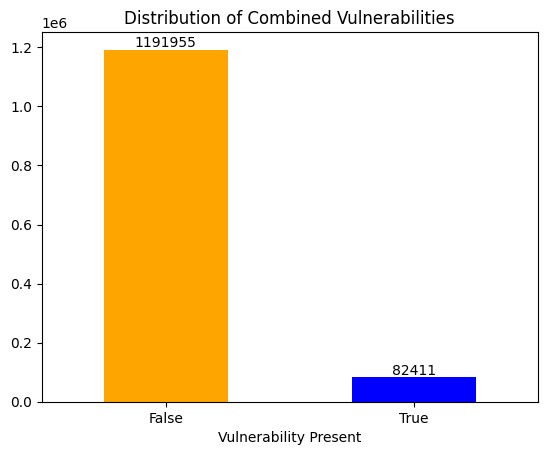

In [35]:
# plot the distribution of combined vulnerabilities
counts = temp['CWE-COMBINED'].value_counts()
ax = counts.plot(kind='bar', color=['orange', 'blue'])
plt.xticks(rotation=0)
plt.title('Distribution of Combined Vulnerabilities')
plt.xlabel('Vulnerability Present')

# Add count labels on top of each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
print(counts)
plt.show()

In [36]:
# Randomly undersample the combined vulnerabilities only
normalize_combined = under_sampling(temp, 'CWE-COMBINED')
normalize_combined.reset_index(inplace=True)
normalize_combined['type'] = 'CWE-COMBINED'
normalize_combined.columns = ['testID', 'code', 'vuln', 'type']
normalize_combined['testID'] = normalize_combined.index
normalize_combined.head()

,testID,code,vuln,type
0,0,"fts_alloc(FTS *sp, const char *name, size_t na...",True,CWE-COMBINED
1,1,lexGetc_()\n {\n /* get next char from i...,True,CWE-COMBINED
2,2,calcNeeded(SessionConfig_t const * cfg)\n{\n ...,False,CWE-COMBINED
3,3,subCopyState(BaseLearner *pBaseLearner)\n\t{\n...,True,CWE-COMBINED
4,4,"scripti_kill(GtkWidget *w,gpointer data) {\n ...",False,CWE-COMBINED


vuln
True     82411
False    82411
Name: count, dtype: int64


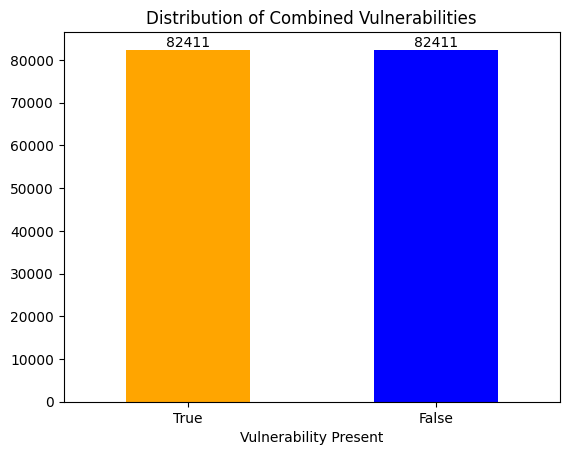

In [40]:
# plot the distribution of combined vulnerabilities
counts = normalize_combined['vuln'].value_counts()
ax = counts.plot(kind='bar', color=['orange', 'blue'])
plt.xticks(rotation=0)
plt.title('Distribution of Combined Vulnerabilities')
plt.xlabel('Vulnerability Present')

# Add count labels on top of each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
print(counts)
plt.show()

In [41]:
# Add filename column to the normalized combined dataframe
normalize_combined = add_filename_column(normalize_combined, "combined")
normalize_combined.head()

,testID,filename,code,vuln,type
0,0,combined_0.c,"fts_alloc(FTS *sp, const char *name, size_t na...",True,CWE-COMBINED
1,1,combined_1.c,lexGetc_()\n {\n /* get next char from i...,True,CWE-COMBINED
2,2,combined_2.c,calcNeeded(SessionConfig_t const * cfg)\n{\n ...,False,CWE-COMBINED
3,3,combined_3.c,subCopyState(BaseLearner *pBaseLearner)\n\t{\n...,True,CWE-COMBINED
4,4,combined_4.c,"scripti_kill(GtkWidget *w,gpointer data) {\n ...",False,CWE-COMBINED


In [45]:
# Save the normalized combined dataframe to a csv file
normalize_combined.to_csv('Datasets/Normalized_CWE-COMBINED.csv.gz', index=False)